In [1]:
#Importing packages needed to complete this lesson
import os

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import earthpy as et

In [3]:
home_dir = os.path.join(et.io.HOME, 'earth-analytics', 'data',
                       'earthpy-downloads')
if not os.path.isdir(home_dir):
    os.makedirs(home_dir)
    
#Working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics',
                     'data', 'earthpy-downloads'))

In [4]:
##Downloading data for the exercise
et.data.get_data(url='https://opendata.arcgis.com/datasets/175425c25d8849b58feb89483ef02961_1.csv')

'C:\\Users\\AgOvi\\earth-analytics\\data\\earthpy-downloads\\OSMP_Climbing_Formations.csv'

In [6]:
# This code will clean up your file name
# This is a temporary fix for a bug in our earthpy package!
old_name_climb = '"OSMP_Climbing_Formations.csv"'
new_name_climb = 'OSMP_Climbing_Formations.csv'
if not os.path.exists(new_name_climb):
    os.rename(old_name_climb, new_name_climb)

In [9]:
boulder_climbing_path = os.path.join(et.io.HOME, 'earth-analytics', 'data',
                                    'earthpy-downloads','OSMP_Climbing_Formations.csv')
boulder_climbing = pd.read_csv(boulder_climbing_path)
boulder_climbing

,X,Y,OBJECTID,ID,FEATURE,ROUTES,HCA,OWNER,SeasonalClosure,AreaAccess,UseRating,AKA,ClosureActive,PERMITREQ,FormationType,Display,FixedHardwarePermit
0,-105.294224,40.005020,1,1.0,Pumpkin Rock,4.0,No,OSMP,N,Flagstaff,2.50,First Areas,N,No,Boulder,Yes,NaN
1,-105.287861,39.975276,2,2.0,Veranda,2.0,No,OSMP,N,NCAR,0.00,NaN,N,No,Wall,Yes,NaN
2,-105.293598,39.995411,3,3.0,Third Pinnacle,7.0,No,OSMP,Y,Gregory Canyon,1.25,NaN,N,No,Wall,Yes,NaN
3,-105.294391,39.986358,4,4.0,The Fin,1.0,No,OSMP,Y,Chautauqua,1.17,NaN,N,No,Wall,Yes,NaN
4,-105.292811,39.995952,5,6.0,First Pinnacle,23.0,No,OSMP,Y,Gregory Canyon,2.20,NaN,N,No,Wall,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,-105.289838,39.978304,1179,NaN,Ridge Two (Satans Slab),NaN,No,OSMP,Y,NCAR,2.00,NaN,N,No,Boulder,Yes,NaN
451,-105.291101,39.978087,1180,NaN,Ridge 3,NaN,No,OSMP,Y,NCAR,1.50,NaN,N,No,Boulder,Yes,Yes
452,-105.288788,39.965708,1181,NaN,Fiddlehead,NaN,No,OSMP,Y,Cragmoor Rd,0.00,NaN,N,No,Wall,Yes,NaN
453,-105.288176,39.973912,1189,NaN,Sunnny Side One,NaN,No,OSMP,N,NCAR,5.50,NaN,N,No,Boulder,Yes,NaN


In [10]:
boulder_climbing.FormationType

0      Boulder
1         Wall
2         Wall
3         Wall
4         Wall
        ...   
450    Boulder
451    Boulder
452       Wall
453    Boulder
454    Boulder
Name: FormationType, Length: 455, dtype: object

<AxesSubplot:>

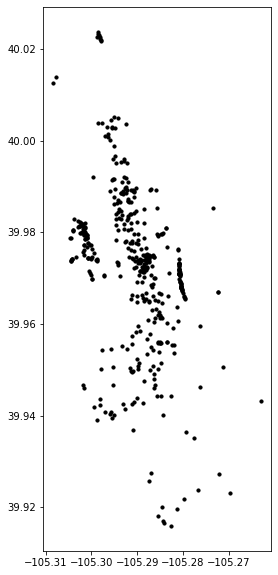

In [19]:
##Challenge 2 : Converting dataframes to geodataframes
coordinates = gpd.points_from_xy(boulder_climbing.X, boulder_climbing.Y)
boulder_gpd = gpd.GeoDataFrame(data=boulder_climbing,
                geometry = coordinates)
f, ax = plt.subplots(figsize = (10,10))
boulder_gpd.plot(color='black', markersize = 10, ax = ax)

In [23]:
# Get the data
et.data.get_data(
    url="https://opendata.arcgis.com/datasets/955e7a0f52474b60a9866950daf10acb_0.geojson")

'C:\\Users\\AgOvi\\earth-analytics\\data\\earthpy-downloads\\City_of_Boulder_City_Limits.geojson'

In [27]:
boulder_city_path = os.path.join(et.io.HOME, 'earth-analytics',
                                'data', 'earthpy-downloads', 'City_of_Boulder_City_Limits.geojson')
boulder_city_path

'C:\\Users\\AgOvi\\earth-analytics\\data\\earthpy-downloads\\City_of_Boulder_City_Limits.geojson'

<AxesSubplot:>

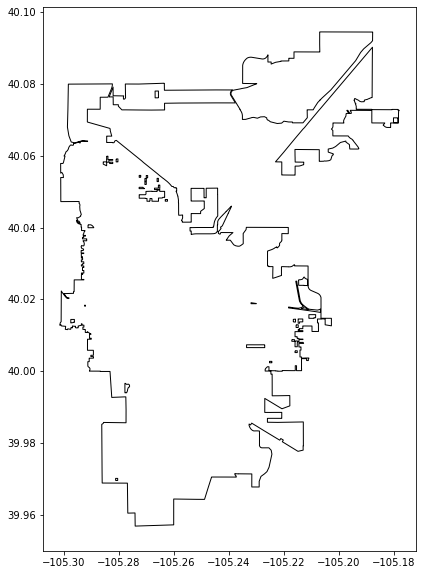

In [30]:
boulder_city = gpd.read_file(boulder_city_path, masked = True)
f, ax = plt.subplots(figsize = (10,10))
boulder_city.plot(color = 'white', edgecolor='black', ax = ax)

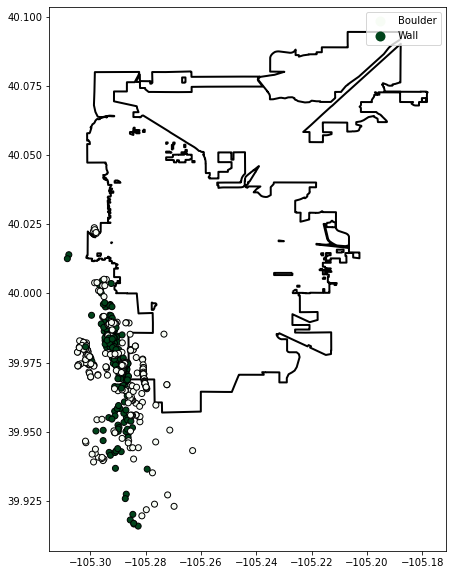

In [42]:
f, ax1 = plt.subplots(figsize = (10,10))
boulder_city.plot(color = 'white', edgecolor = 'black',linewidth = 2, ax = ax1)
boulder_gpd.plot(column='FormationType', legend = True, ax = ax1, cmap = 'Greens', edgecolor = 'black')
ax.set_title('Climbing Locations - Boulder, CO')
ax.set_axis_off()


plt.show()

C:\Users\AgOvi\AppData\Local\Temp\ipykernel_2284\983830363.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  climbing_in_boulder = gpd.clip(boulder_gpd,boulder_city)


<AxesSubplot:>

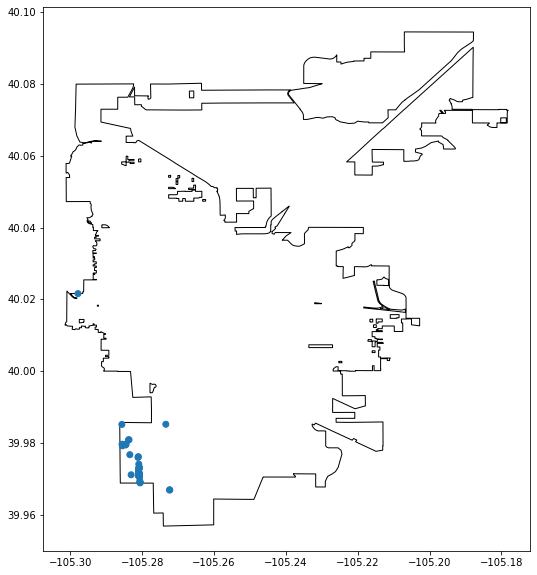

In [46]:
climbing_in_boulder = gpd.clip(boulder_gpd,boulder_city)
f, ax = plt.subplots(figsize = (10,10))
boulder_city.plot(edgecolor = 'black', color ='white', ax = ax)
climbing_in_boulder.plot(column = 'FormationType', ax=ax)
